In [20]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from PIL import Image

In [21]:
# Загрузка изображения
f = cv2.imread('C:/Users/yulia/OneDrive/Docs/Stydy/UZI/laba2/xraychest.jpg')
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
window_name = 'image'
cv2.imshow(window_name, f)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [22]:
# Прямоe преобразования Фурье
F = np.fft.fft2(f) # Прямое преобразование фурье
Fshift = np.fft.fftshift(F) # Выравнивание по центру
cv2.imshow(window_name, 0.1*np.log1p(np.abs(Fshift)))
cv2.waitKey(0)

-1

### 2.1. Выполните операцию низкочастотной фильтрации исходного изображения рентгеновского снимка грудной клетки xraychest.jpg. 

In [23]:
def IMAGE_COLORMAP (image):
    image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    image_normalized = image_normalized.astype(np.uint8)
    image_colored = cv2.applyColorMap(image_normalized, cv2.COLORMAP_BONE) # Применение цветовой карты
    return image_colored

In [24]:
image_grey = cv2.cvtColor(IMAGE_COLORMAP(f), cv2.COLOR_BGR2GRAY) 
M, N = image_grey.shape
H1_p = np.zeros((M,N), dtype=np.float32) # Передаточная функция низкочастотного фильтра
D0 = 50 # точка профиля фильтра (частота среза)
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2) # Расстояние от точки (u, v) до начала координат
        if D <= D0:
            H1_p[u,v] = 1
        else:
            H1_p[u,v] = 0

Gshift = Fshift * H1_p # Выходное преобразование Фурье
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

g_mask = cv2.cvtColor(IMAGE_COLORMAP(g), cv2.COLOR_BGR2GRAY) 

cv2.imshow(window_name, g_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 2.2. Подбором параметра A добейтесь наилучшего результата повыше резкости с помощью подъема частотной характеристики. 

In [25]:
A = 2
f_hb = np.add(A*f, - g_mask)
cv2.imshow(window_name, IMAGE_COLORMAP(f_hb))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite ('Image_f_hb.jpg', IMAGE_COLORMAP(f_hb))


True

### 2.3. Изображение, полученное в результате выполнения пункта 2.2, подвергните процедуре гистограммной эквализации.

In [26]:

def equalizeHist (image_path, image_nane):
    img_HPF = cv2.imread(image_path)
    img_to_yuv = cv2.cvtColor(img_HPF, cv2.COLOR_BGR2YUV) 
    img_to_yuv[:,:,0] = cv2.equalizeHist (img_to_yuv[:,:,0]) 
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR) 
    cv2.imwrite(image_nane, hist_equalization_result)
    im1 =Image.open(image_nane)
    img= cv2.imread(image_nane) 
    im1.show() 
    hist = im1.histogram()
    hist= plt.hist (img.ravel (),256, [0,256])
    plt.show()

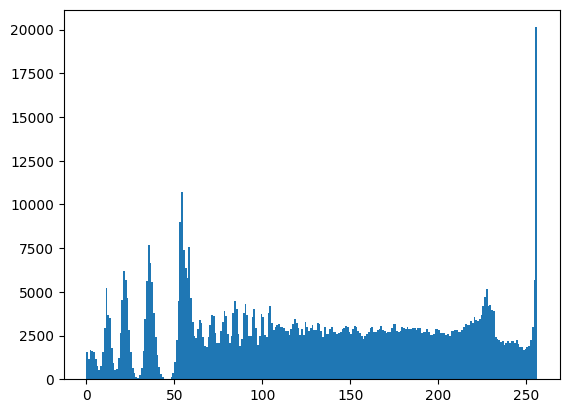

In [27]:
equalizeHist('Image_f_hb.jpg', 'Image_f_hb_1.jpg')

### 3.1 Выполните операцию высокочастотной фильтрации исходного изображения рентгеновского снимка грудной клетки xraychest.jpg.

In [ ]:

H_hp = 1 - H1_p


: 

### 3.2 Подбором параметров a и b добейтесь усиления высоких частот.

In [ ]:
a = 0.25
b = 1
H_hfe = a + b * H_hp
Gshift = Fshift * H_hfe
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

cv2.imshow(window_name, IMAGE_COLORMAP(g))
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite ('Image_g_hb.jpg', IMAGE_COLORMAP(g))

### 3.3. Изображение, полученное в результате выполнения пункта 3.2, подвергните процедуре гистограммной эквализации. 

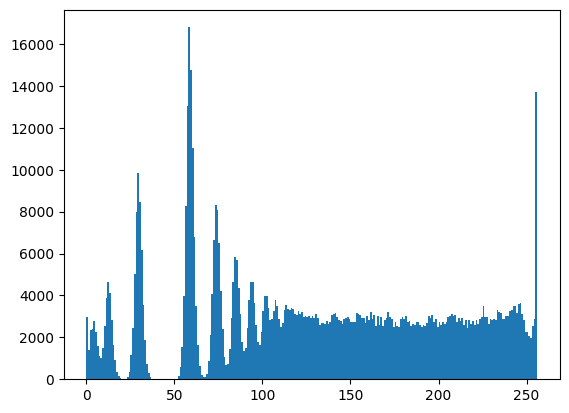

In [ ]:
equalizeHist('Image_g_hb.jpg', 'Image_g_hb_1.jpg')